In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import numpy as np

Using TensorFlow backend.


In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_set = np.load('/content/gdrive/My Drive/Colab Notebooks/img_numpy_train.npy')

In [ ]:

train_data = data_set[400:,:,:]
test_data = data_set[:400,:,:]

train_data = train_data.reshape((-1, 266, 410, 1)) 
train_data = train_data.astype('float32') / 255.

test_data = test_data.reshape((-1, 266, 410, 1)) 
test_data = test_data.astype('float32') / 255.

In [ ]:
print(train_data.shape)
print(test_data.shape)

(2453, 266, 410, 1)
(400, 266, 410, 1)


In [ ]:
from keras import optimizers
input_img = Input(shape=(266, 410, 1)) 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 266, 410, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 266, 410, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 133, 205, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 133, 205, 16)      4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 67, 103, 16)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 67, 103, 16)       2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 134, 206, 16)      0         
__________

In [ ]:
history= autoencoder.fit(train_data, train_data,
                epochs=3,
                batch_size=32,
                shuffle=True,
                validation_data=(test_data, test_data))

Instructions for updating:
Use tf.cast instead.
Train on 2453 samples, validate on 400 samples
Epoch 1/3
2453/2453 [==============================] - 18s 7ms/step - loss: 0.5310 - val_loss: 0.5032
Epoch 2/3
2453/2453 [==============================] - 12s 5ms/step - loss: 0.4941 - val_loss: 0.4985
Epoch 3/3
2453/2453 [==============================] - 12s 5ms/step - loss: 0.4920 - val_loss: 0.4967


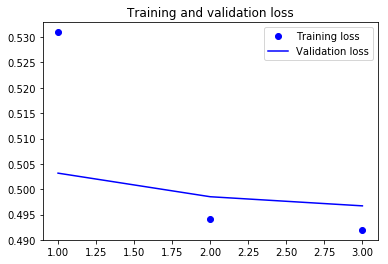

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

In [ ]:
#autoencoder.save('/content/gdrive/My Drive/Colab Notebooks/MSE_epoch8.hdf5')

In [ ]:
#from keras.models import load_model
#autoencoder = load_model('/content/gdrive/My Drive/Colab Notebooks/MSE_epoch8.hdf5')

In [ ]:
data_test = np.load('/content/gdrive/My Drive/Colab Notebooks/img_numpy_test.npy')
data_test = data_test.astype('float32') / 255.
data_test_pass = data_test[9:,:,:]
data_test_fail = data_test[:9,:,:]
data_test_pass = data_test_pass[:, :, :, np.newaxis]
data_test_fail = data_test_fail[:, :, :, np.newaxis]

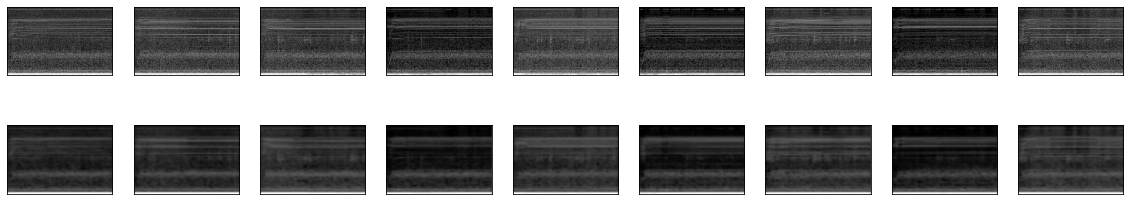

In [ ]:
#validation
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(test_data)

n = 9  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(266,410))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(266,410))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

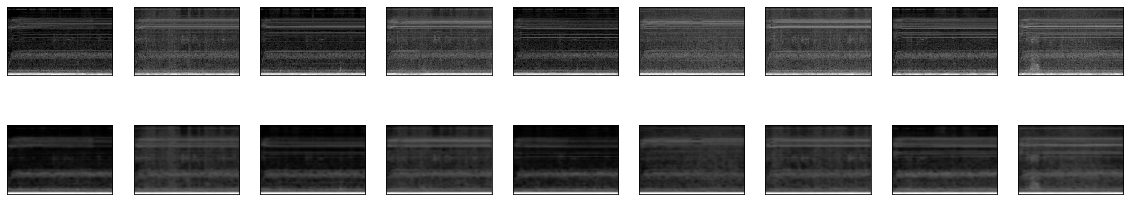

In [ ]:
#test - pass
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(data_test_pass)

n = 9  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data_test_pass[i].reshape(266,410))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(266,410))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

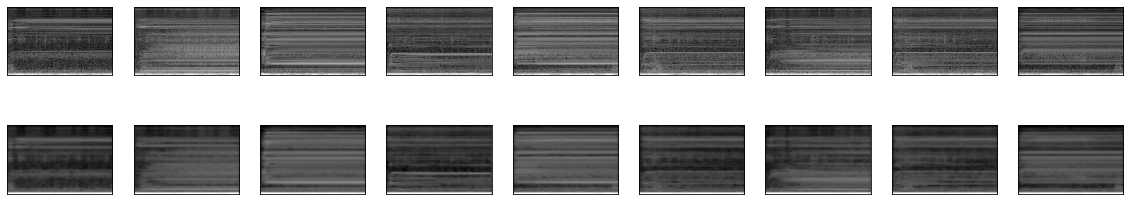

In [ ]:
#test - fail
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(data_test_fail)

n = 9  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data_test_fail[i].reshape(266,410))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(266,410))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()